In [1]:
!pip install -q -U autogluon.tabular

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.29.165 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [2]:
from autogluon.tabular import TabularPredictor,TabularDataset
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import shutil

warnings.filterwarnings('ignore')
seed = 27

# Loading the Dataset

In [3]:
train = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/train.csv', index_col='id')

In [4]:
# feats_to_drop = [
#     '_sort_6', '_cnt17', 'Deforestation', 'Watersheds', '_std', '_cnt1', '_cnt12', 
#     '_cnt16', '_cnt8', '_sort_9', 'RiverManagement', 'Encroachments', '_30th', '_10th', 
#     '_min', 'DrainageSystems', '_sort_7', '_40th', '_sort_5', 'PoliticalFactors', 
#     'ClimateChange', '_mode', 'Landslides', 'TopographyDrainage', 'PopulationScore'
# ]
# train = train.drop(columns=feats_to_drop)

In [5]:
_train, _val = train_test_split(
    train, 
    test_size=0.1, 
    random_state=seed
)

del train

In [6]:
_train = TabularDataset(_train)
_val = TabularDataset(_val)

# Training

In [7]:
predictor = TabularPredictor(
    label='FloodProbability',
    eval_metric='r2',
    problem_type="regression",
    verbosity=2
).fit(
    train_data=_train,
    time_limit=3600 * 10,
    presets="good_quality",
    excluded_model_types = ["NN_TORCH", "FASTAI", "NN"],
    keep_only_best=True,
    hyperparameter_tune_kwargs={  
        'num_trials': 50,
        'scheduler' : 'local',
        'searcher'  : 'auto'
    },
    feature_prune_kwargs={"force_prune": True}
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240522_155413"
Presets specified: ['good_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked

  0%|          | 0/50 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray==2.9.0 detected. 2.10.0 <= ray < 2.11.0 is required. You can use pip to install certain version of ray `pip install ray==2.10.0` 
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 246. Best iteration is:
	[211]	valid_set's l2: 0.000350326	valid_set's r2: -80.6526
	Ran out of time, early stopping on iteration 275. Best iteration is:
	[273]	valid_set's l2: 0.000347498	valid_set's r2: -81.0542
	Ran out of time, early stopping on iteration 284. Best iteration is:
	[269]	valid_set's l2: 0.000347556	valid_set's r2: -80.7854
	Ran out of time, early stopping on iteration 293. Best iteration is:
	[288]	valid_set's l2: 0.000347957	valid_set's r2: -81.2564
	Ran out of time, early stopping on iteration 318. Best iteration is:
	[305]	valid_set's l2: 0.000347171	valid_set's r2: -81.1822
	Ran out of time, early stopping on iteration 35

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 37. Best iteration is:
	[37]	valid_set's l2: 0.00178501	valid_set's r2: -82.6071
	Ran out of time, early stopping on iteration 38. Best iteration is:
	[38]	valid_set's l2: 0.00175036	valid_set's r2: -83.183
	Ran out of time, early stopping on iteration 40. Best iteration is:
	[39]	valid_set's l2: 0.00174189	valid_set's r2: -82.6964
	Ran out of time, early stopping on iteration 41. Best iteration is:
	[41]	valid_set's l2: 0.00171261	valid_set's r2: -81.0405
	Ran out of time, early stopping on iteration 43. Best iteration is:
	[43]	valid_set's l2: 0.001671	valid_set's r2: -81.525
	Ran out of time,

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 237.
	Ran out of time, early stopping on iteration 249.
	Ran out of time, early stopping on iteration 256.
	Ran out of time, early stopping on iteration 270.
	Ran out of time, early stopping on iteration 281.
	Ran out of time, early stopping on iteration 297.
	Ran out of time, early stopping on iteration 327.
	Ran out of time, early stopping on iteration 405.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.8681	 = Validation score   (r2)
	733.37s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 770.52s of the 6004.23s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	0.8692	 = Validation score   (r2

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.869	 = Validation score   (r2)
	736.49s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 770.52s of the 4460.68s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.6194	 = Validation score   (r2)
	250.42s	 = Training   runtime
	1.75s	 = Validation runtime
Insufficient time to train even a single feature pruning model (remaining: 0, needed: 695.6386482715607). Skipping feature pruning.
Fitting model: WeightedEnsemble_L2 ... Training model for up to 599.29s of the 4206.24s of remaining time.
	Ensemble Weights: {'ExtraTreesMSE_BAG_L1': 0.5, 'XGBoost_BAG_L1/T1': 0.375, 'RandomForestMSE_BAG_L1': 0.125}
	0.8693	 = Validation score   (r2)
	3.24s	 = Training   runtime
	0.02s	 = Validation runtime
Excluded mo

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 151. Best iteration is:
	[108]	valid_set's l2: 0.000342176	valid_set's r2: -81.4193
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L2/T1 ...
	0.8573	 = Validation score   (r2)
	362.51s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 540.37s of the 3836.16s of remaining time.


  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	0.6299	 = Validation score   (r2)
	218.83s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	0.6534	 = Validation score   (r2)
	205.21s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L2 ... Tuning model for up to 540.37s of the 3406.86s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 1334, in _hyperparameter_tune
    hpo_executor.validate_search_space(search_space, self.name)
  File "/opt/cond

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 141.
	Ran out of time, early stopping on iteration 145.
	Ran out of time, early stopping on iteration 153.
	Ran out of time, early stopping on iteration 160.
	Ran out of time, early stopping on iteration 167.
	Ran out of time, early stopping on iteration 185.
	Ran out of time, early stopping on iteration 201.
	Ran out of time, early stopping on iteration 238.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.8689	 = Validation score   (r2)
	512.89s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 540.37s of the 2828.43s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L2 ...
	0.8691	 = Validation score   (r2

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	0.8692	 = Validation score   (r2)
	515.55s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 540.37s of the 1864.2s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.6731	 = Validation score   (r2)
	312.13s	 = Training   runtime
	2.25s	 = Validation runtime
Insufficient time to train even a single feature pruning model (remaining: 0, needed: 362.5053856372833). Skipping feature pruning.
Fitting model: WeightedEnsemble_L3 ... Training model for up to 420.29s of the 1546.05s of remaining time.
	Ensemble Weights: {'ExtraTreesMSE_BAG_L1': 0.308, 'XGBoost_BAG_L1/T1': 0.231, 'ExtraTreesMSE_BAG_L2': 0.231, 'XGBoost_BAG_L2/T1': 0.154, 'RandomForestMSE_BAG_L1': 0.077}
	0.8694	 = Validation score   (r2)
	4.1s	 =

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's l2: 0.000345036	valid_set's r2: -81.7858


	Ran out of time, early stopping on iteration 1060. Best iteration is:
	[938]	valid_set's l2: 0.000345168	valid_set's r2: -81.7857
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L1/T1 ...
	0.8663	 = Validation score   (r2)
	1166.86s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L1/T2 ...
	0.8663	 = Validation score   (r2)
	882.6s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L1 ... Tuning model for up to 2399.98s of the 25952.16s of remaining time.


  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 69. Best iteration is:
	[69]	valid_set's l2: 0.0011141	valid_set's r2: -81.5148
	Ran out of time, early stopping on iteration 72. Best iteration is:
	[70]	valid_s

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 690.
	Ran out of time, early stopping on iteration 704.
	Ran out of time, early stopping on iteration 731.
	Ran out of time, early stopping on iteration 749.
	Ran out of time, early stopping on iteration 794.
	Ran out of time, early stopping on iteration 845.
	Ran out of time, early stopping on iteration 932.
	Ran out of time, early stopping on iteration 1100.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.8689	 = Validation score   (r2)
	2296.09s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 2399.98s of the 18865.89s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	0.8692	 = Validation score  

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.8691	 = Validation score   (r2)
	2159.2s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 2399.98s of the 14973.53s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.6156	 = Validation score   (r2)
	285.48s	 = Training   runtime
	1.99s	 = Validation runtime
Insufficient time to train even a single feature pruning model (remaining: 0, needed: 882.5998821258545). Skipping feature pruning.
Fitting model: WeightedEnsemble_L2 ... Training model for up to 1866.65s of the 14682.68s of remaining time.
	Ensemble Weights: {'ExtraTreesMSE_BAG_L1': 0.5, 'XGBoost_BAG_L1/T1': 0.312, 'RandomForestMSE_BAG_L1': 0.125, 'CatBoost_BAG_L1/T1': 0.062}
	0.8694	 = Validation score   (r2)
	3.78s	 = Training   runtime
	0.02s

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 218. Best iteration is:
	[159]	valid_set's l2: 0.00068253	valid_set's r2: -81.0572
	Ran out of time, early stopping on iteration 223. Best iteration is:
	[215]	valid_set's l2: 0.000516847	valid_set's r2: -81.4536
	Ran out of time, early stopping on iteration 233. Best iteration is:
	[209]	valid_set's l2: 0.000529661	valid_set's r2: -81.112
	Ran out of time, early stopping on iteration 237. Best iteration is:
	[189]	valid_set's l2: 0.000577994	valid_set's r2: -81.4235
	Ran out of time, early stopping on iteration 268. Best iteration is:
	[199]	valid_set's l2: 0.00055181	valid_set's r2: -81.2034
	

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	0.6173	 = Validation score   (r2)
	256.91s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	0.6534	 = Validation score   (r2)
	241.67s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	0.6269	 = Validation score   (r2)
	267.62s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T4 ...
	0.6343	 = Validation score   (r2)
	867.21s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L2 ... Tuning model for up to 1887.2

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 472.
	Ran out of time, early stopping on iteration 474.
	Ran out of time, early stopping on iteration 503.
	Ran out of time, early stopping on iteration 512.
	Ran out of time, early stopping on iteration 535.
	Ran out of time, early stopping on iteration 570.
	Ran out of time, early stopping on iteration 638.
	Ran out of time, early stopping on iteration 756.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.8691	 = Validation score   (r2)
	1804.19s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 1887.27s of the 7451.63s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L2 ...
	0.8694	 = Validation score   (

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	0.8693	 = Validation score   (r2)
	1024.44s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 1887.27s of the 4481.08s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.6679	 = Validation score   (r2)
	360.51s	 = Training   runtime
	2.54s	 = Validation runtime
Insufficient time to train even a single feature pruning model (remaining: 0, needed: 319.0125505924225). Skipping feature pruning.
Fitting model: WeightedEnsemble_L3 ... Training model for up to 1467.88s of the 4112.6s of remaining time.
	Ensemble Weights: {'ExtraTreesMSE_BAG_L2': 0.455, 'XGBoost_BAG_L1/T1': 0.182, 'XGBoost_BAG_L2/T1': 0.182, 'ExtraTreesMSE_BAG_L1': 0.091, 'RandomForestMSE_BAG_L2': 0.091}
	0.8695	 = Validation score   (r2)
	7.29

In [8]:
X_train = _train.drop('FloodProbability', axis=1)
y_train = _train['FloodProbability']

y_preds = predictor.predict(X_train)

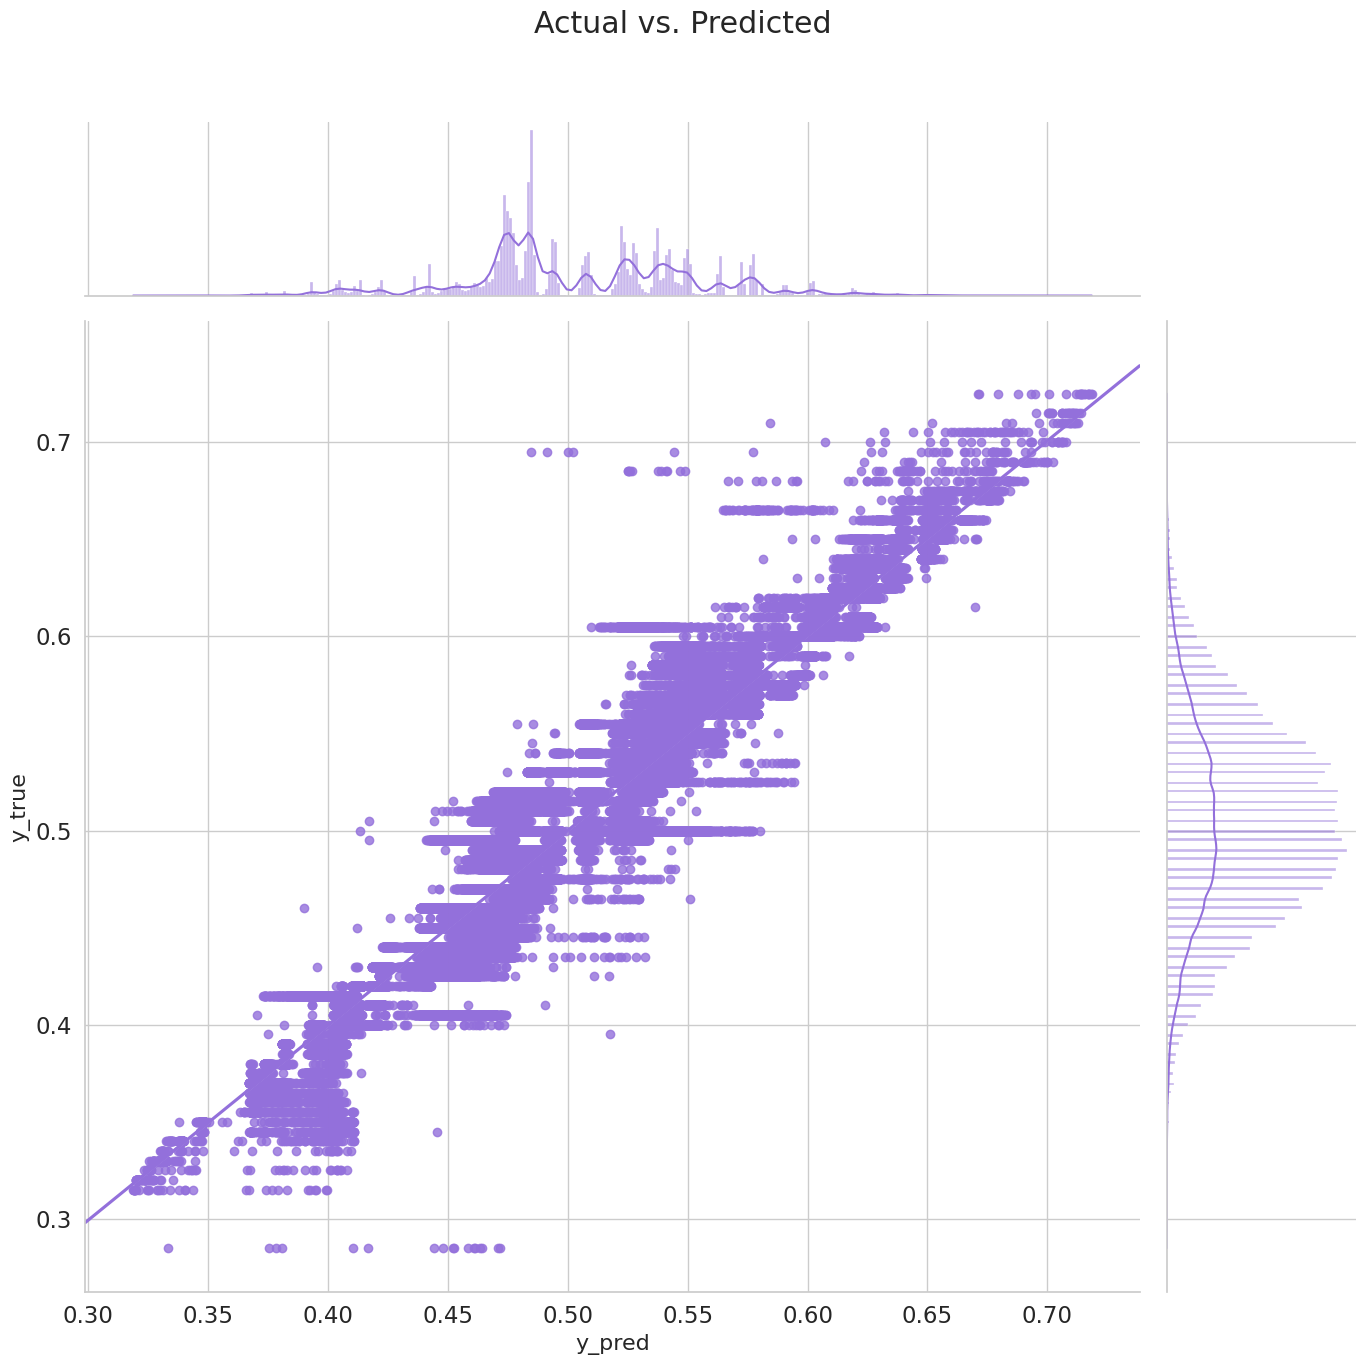

In [9]:
sns.set(style="whitegrid", font_scale=1.5)
g = sns.jointplot(
    x=y_preds,
    y=y_train,
    kind="reg",
    truncate=False,
    color='#9370DB',
    height=14,
)
g.set_axis_labels('y_pred', 'y_true', fontsize=16)
g.fig.suptitle("Actual vs. Predicted")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

# Visualizing the Results

In [10]:
score = predictor.evaluate(_val, silent=True)['r2']

In [11]:
print(f"Validation R2 Score: {score}")

Validation R2 Score: 0.8695544244180824


In [12]:
fi = predictor.feature_importance(data=_val, silent=True)
lb = predictor.leaderboard(_val, silent=True)

These features in provided data are not utilized by the predictor and will be ignored: ['_sort_0', '_sort_19', '_50th', '_cnt18', '_cnt19', '_cnt22']


In [13]:
lb.style.background_gradient(subset=['score_val', 'score_test'], cmap='RdYlGn')

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesMSE_BAG_L2_FULL,0.869570,None,r2,14.818449,nan,6686.277285,3.048532,70.868903,1865.895629,2,True,18
1,WeightedEnsemble_L3_FULL,0.869554,None,r2,16.628926,nan,8652.588196,0.007446,nan,7.287147,3,True,20
2,RandomForestMSE_BAG_L2_FULL,0.869428,None,r2,12.693574,nan,6743.763748,0.923657,25.531594,1923.382092,2,True,17
3,ExtraTreesMSE_BAG_L1_FULL,0.869426,None,r2,3.238432,71.457467,1653.547577,3.238432,71.457467,1653.547577,1,True,1
4,XGBoost_BAG_L2/T1_FULL,0.869419,None,r2,12.649291,nan,4856.023327,0.879374,nan,35.641672,2,True,19
5,RandomForestMSE_BAG_L1_FULL,0.869201,None,r2,1.891125,47.005545,2353.670391,1.891125,47.005545,2353.670391,1,True,14
6,XGBoost_BAG_L1/T1_FULL,0.869038,None,r2,1.297883,nan,52.827410,1.297883,nan,52.827410,1,True,2
7,CatBoost_BAG_L1/T1_FULL,0.868964,None,r2,0.106261,nan,330.996538,0.106261,nan,330.996538,1,True,15
8,LightGBMXT_BAG_L1/T1_FULL,0.867088,None,r2,1.932441,nan,127.533955,1.932441,nan,127.533955,1,True,3
9,LightGBMXT_BAG_L1/T2_FULL,0.866736,None,r2,1.625907,nan,90.094905,1.625907,nan,90.094905,1,True,4


In [14]:
fi.style.background_gradient(cmap='RdYlGn')

,importance,stddev,p_value,n,p99_high,p99_low
_sum,0.819154,0.007029,0.000000,5,0.833628,0.804681
_sum_log,0.037107,0.000640,0.000000,5,0.038426,0.035789
_mean,0.030215,0.000555,0.000000,5,0.031358,0.029072
_entropy,0.006374,0.000687,0.000016,5,0.007789,0.004960
_special1,0.001116,0.000170,0.000062,5,0.001465,0.000767
_2nd_moment,0.001097,0.000089,0.000005,5,0.001281,0.000914
_max,0.000751,0.000223,0.000829,5,0.001210,0.000292
_cnt15,0.000538,0.000163,0.000901,5,0.000874,0.000202
_gmean,0.000363,0.000354,0.042063,5,0.001092,-0.000367
_skew,0.000335,0.000157,0.004413,5,0.000658,0.000012


# Making Predictions and Creating a Submission File

In [15]:
test = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/test.csv', index_col='id')
# test = test.drop(columns=feats_to_drop)
test = TabularDataset(test)

preds = predictor.predict(test)

In [16]:
submission = pd.DataFrame({'id': test.index, 'FloodProbability ': preds})
submission.to_csv(f'autogluon-{score:.6f}.csv', index=False)
submission.head()

,id,FloodProbability
id,,
1117957,1117957,0.578955
1117958,1117958,0.455899
1117959,1117959,0.448006
1117960,1117960,0.466709
1117961,1117961,0.466340


In [17]:
shutil.rmtree("AutogluonModels")